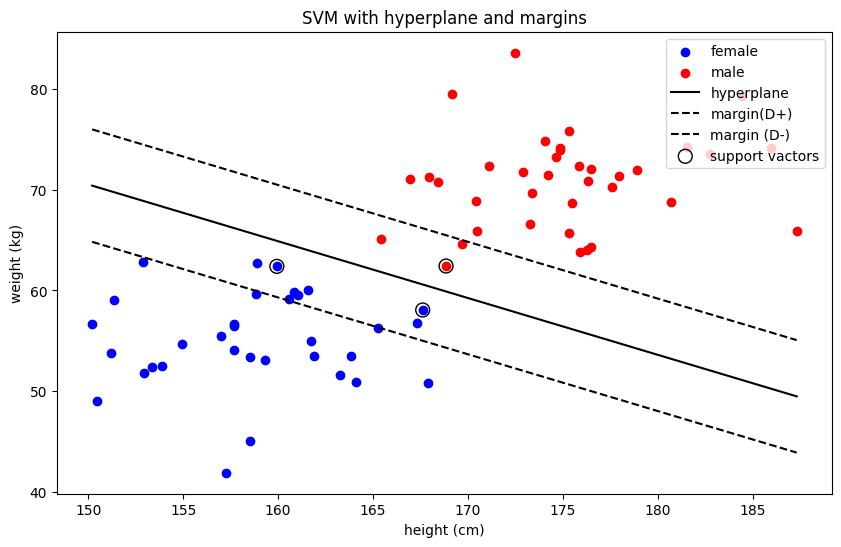

hyperplane: W = [0.22267909 0.39497043], b = -61.255430385142326
margin: 2.205471892676
support vectors:
[[167.61514928  58.05838144]
 [159.93251388  62.38947022]
 [168.84567842  62.42576388]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

#step 1 : stimulate data ( e.g., height, weight to classify male/female)
np.random.seed(42)
#females: shorter and lighter
female_height = np.random.normal(160, 5, 50)
female_weight = np.random.normal(55, 5, 50)
female_labels = np.zeros(50)   # 0 for females

# Males : taller and heavier
male_height = np.random.normal(175, 5, 50)
male_weight = np.random.normal(70, 5, 50)
male_labels = np.ones(50)  # 1 for males

#combine the data

height = np.concatenate((female_height, male_height))
weight = np.concatenate((female_weight, male_weight))
labels = np.concatenate((female_labels, male_labels))

# stack height and weight as features
features = np.column_stack((height, weight))

# step 2 : split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# step 3: train an SVM classifier
SVM = SVC(kernel='linear', C=1.0, random_state=42)
SVM.fit(X_train, y_train)

# Get hyperplane parameters

W = SVM.coef_[0]  # Coefficients for hyperplane
b = SVM.intercept_[0]  # intercept term

# Calculate
margin = 1 / np.linalg.norm(W)

# define the hyperplane equation: W0*x + W1*y + b = 0
X_vals = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
hyperplane = -(W[0] / W[1]) * X_vals - (b / W[1])  # Decision boundary
margin_positive = hyperplane + margin * (1 / W[1])  # positive margin (D+)
margin_negative = hyperplane - margin * (1 / W[1])  # Negative margin (D-)

# step 4 : Visualize results
plt.figure(figsize=(10, 6))

# plot the data points
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='female')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='male')

# plot the hyperplane and margin
plt.plot(X_vals, hyperplane, 'k-', label='hyperplane')
plt.plot(X_vals, margin_positive, 'k--', label='margin(D+)')
plt.plot(X_vals, margin_negative, 'k--', label='margin (D-)')


# highlight support vectors
plt.scatter(SVM.support_vectors_[:, 0], SVM.support_vectors_[:, 1], s=100, edgecolor='k', facecolor='none', label='support vactors')

# add labels , legend, and title
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.title('SVM with hyperplane and margins')
plt.legend(loc='upper right')
plt.show()

# step 5: output key information
print(f"hyperplane: W = {W}, b = {b}")
print(f"margin: {margin}")
print(f"support vectors:\n{SVM.support_vectors_}")